In [84]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [49]:
ses=pd.read_csv('/Users/inan/Desktop/relax_challenge/takehome_user_engagement.csv')

In [50]:
ses.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [87]:
df=pd.read_csv('/Users/inan/Desktop/relax_challenge/takehome_users.csv',encoding='latin-1')

In [6]:
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [51]:
ses['time_stamp'] = pd.to_datetime(ses['time_stamp']) - pd.to_timedelta(7, unit='d')

In [52]:
ses_stats = pd.Series([])

/Users/inan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [53]:

days = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
for day in days:
    k = ses.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W-' + day)])['visited'].count().reset_index().sort_values('user_id')
    k = k.groupby('user_id')['visited'].max()
    if len(ses_stats) == 0:
        ses_stats = k
    else:
        ses_stats = pd.DataFrame([ses_stats, k]).max()

In [54]:

ses_stats.head()

user_id
1    1
2    3
3    1
4    1
5    1
dtype: int64

In [90]:
df['adopted_user'] = df['object_id'].apply(lambda x: 1 if x in ses_stats and ses_stats[x] >= 3 else 0)


In [91]:
df['adopted_user'].value_counts()


0    10398
1     1602
Name: adopted_user, dtype: int64

In [92]:
invited_users = df[df['invited_by_user_id'].notnull()]['invited_by_user_id'].astype('int')
invited_users = pd.Series(1, index=invited_users)

## EDA

/Users/inan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


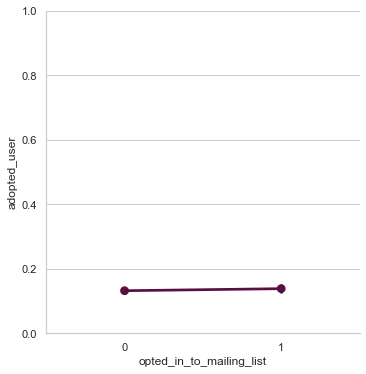

In [93]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['opted_in_to_mailing_list'], y_vars='adopted_user', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

/Users/inan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


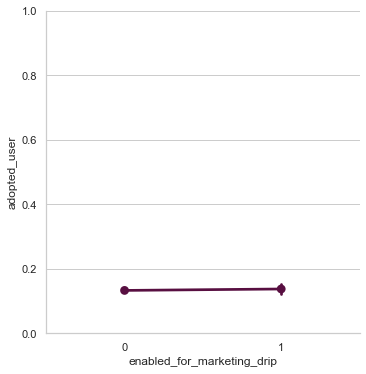

In [94]:
g = sns.PairGrid(data=df, x_vars=['enabled_for_marketing_drip'], y_vars='adopted_user', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

/Users/inan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


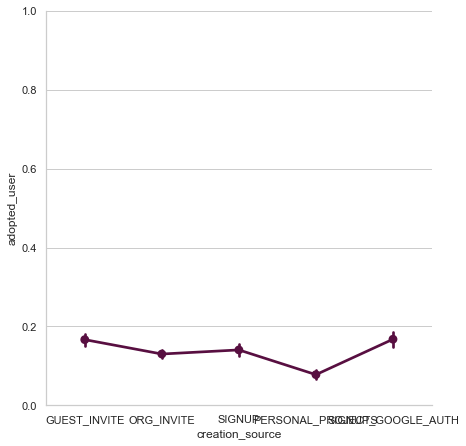

In [95]:
g = sns.PairGrid(data=df, x_vars=['creation_source'], y_vars='adopted_user', size=6)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

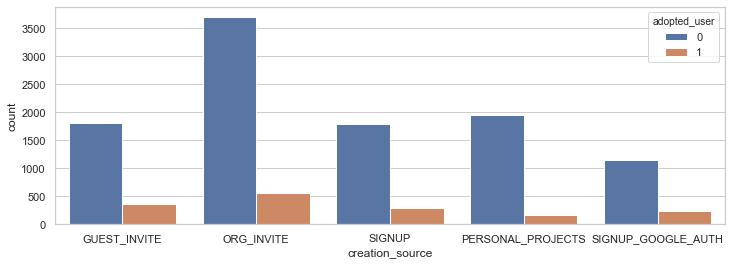

In [96]:
plt.figure(figsize=(12,4))
sns.countplot(x='creation_source', data=df, hue='adopted_user')

In [97]:
df['invited'] = df['object_id'].apply(lambda x: 1 if x in invited_users else 0)

/Users/inan/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


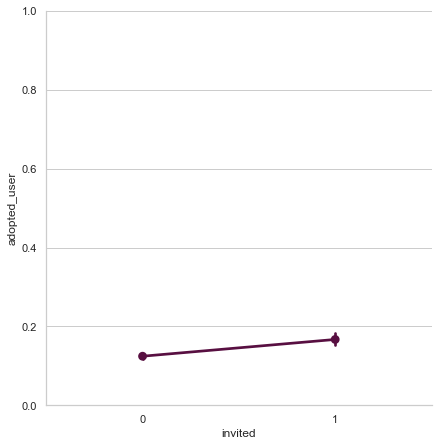

In [98]:
g = sns.PairGrid(data=df, x_vars=['invited'], y_vars='adopted_user', size=6)
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))

In [99]:
def stacked_bar(feature):
    ctab = pd.crosstab([df[feature]], df['adopted_user'], dropna=False).apply(lambda x: x/x.sum(), axis=1)
    ctab.plot(kind='bar', stacked=True, legend=False)

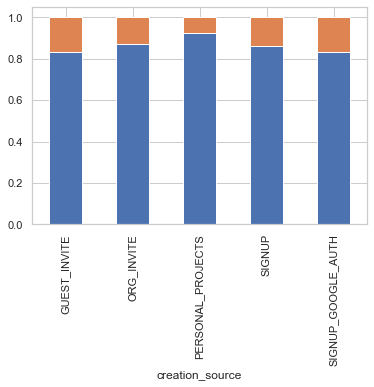

In [100]:
stacked_bar('creation_source')


In [101]:
df['email'] = df['email'].apply(lambda x: x[x.find('@')+1:])
major_domains = ['gmail.com', 'yahoo.com', 'jourrapide.com', 'cuvox.de', 'gustr.com', 'hotmail.com']
df['email'] = df['email'].apply(lambda x: 'other' if x not in major_domains else x[:x.find('.')])

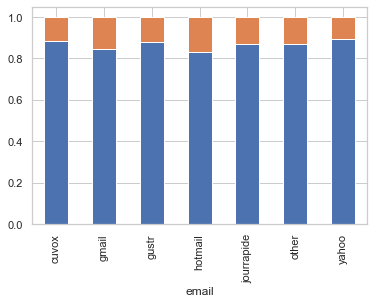

In [102]:
stacked_bar('email')

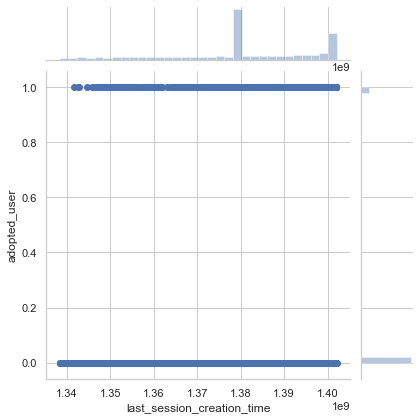

In [115]:
sns.jointplot(x='last_session_creation_time', y='adopted_user', data=df)


In [103]:
df = df.set_index('object_id')

In [104]:
df = df.drop('name', axis=1)

In [105]:
df['email'].value_counts().head(10)

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
other         1186
gustr         1179
hotmail       1165
Name: email, dtype: int64

In [106]:
df = df.drop('invited_by_user_id', axis=1)

In [107]:
df['org_id'].value_counts().shape

(417,)

In [108]:
df[df['adopted_user'] == 1]['org_id'].value_counts().shape

(400,)

In [109]:
df = df.drop('org_id', axis=1)

In [110]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['month'] = df['creation_time'].apply(lambda x: x.month)
df['year'] = df['creation_time'].apply(lambda x: x.year)

In [111]:
df = df.drop('creation_time', axis=1)


In [112]:
df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')

In [113]:
df = pd.get_dummies(df, prefix='is')

In [114]:
df['last_session_creation_time'] = df['last_session_creation_time'].fillna(df['last_session_creation_time'].mean())

## Machine Learning

In [116]:
X, y = df.drop('adopted_user', axis=1), df['adopted_user']


In [117]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.85, test_size=0.15, stratify=y)


In [118]:
classifier = GradientBoostingClassifier(verbose=True)
classifier.fit(train_X, train_y)
classifier.score(test_X, test_y)

      Iter       Train Loss   Remaining Time 
         1           0.6614            1.98s
         2           0.5948            1.74s
         3           0.5478            1.74s
         4           0.5112            1.66s
         5           0.4798            1.58s
         6           0.4502            1.50s
         7           0.4282            1.47s
         8           0.4077            1.42s
         9           0.3927            1.39s
        10           0.3788            1.35s
        20           0.3070            1.13s
        30           0.2727            0.96s
        40           0.2415            0.82s
        50           0.2184            0.70s
        60           0.2051            0.58s
        70           0.1955            0.44s
        80           0.1851            0.29s
        90           0.1792            0.14s
       100           0.1719            0.00s


0.9766666666666667

In [119]:
confusion_matrix(test_y, classifier.predict(test_X))


array([[1550,   10],
       [  32,  208]])

In [121]:
classifier.feature_importances_.shape


(31,)

In [122]:
features = pd.Series(classifier.feature_importances_, index=X.columns)


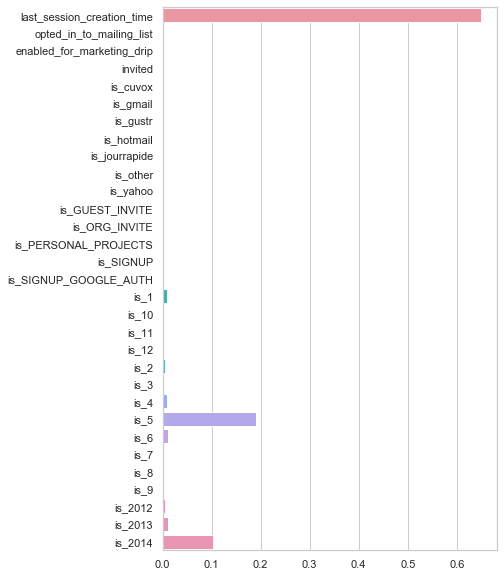

In [123]:
plt.figure(figsize=(6,10))
sns.barplot(y=X.columns, x=classifier.feature_importances_)

## Conclusion

From the analysis and the predictive modeling that we have performed above, the results can be summarized as follows:

-86% of our userbase are non adopted users. This clearly indicates that there is a lot that can be done to decrease this proportion relative to the number of adopted users.

-last_session_creation_time is the most important feature when it comes to predicting adopted users. It accounts for more than 68% of the importance in our Gradient Boosting Classifier.

-Year and Month of account created is the next most important information. However, its importance is negligible compared to last login time.

-All the other features have close to zero importance and do not explain the target variable well.